In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
import os

In [2]:
pwd()

"C:\\Users\\Arjit's Hardwork\\Documents\\Python\\dipi\\PANDAS"

In [4]:
os.chdir("C:\\Users\\Arjit's Hardwork\\Documents\\Python\\dipi\\PANDAS")

In [108]:
df=pd.read_csv(r"C:\\Users\\Arjit's Hardwork\\Documents\\Python\\dipi\\PANDAS\\kaggle house prices\\train.csv")

In [109]:
dt=pd.read_csv(r"C:\\Users\\Arjit's Hardwork\\Documents\\Python\\dipi\\PANDAS\\kaggle house prices\\test.csv")

In [13]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#MSSubClass: Identifies the type of dwelling involved in the sale.(1 story,2 story)

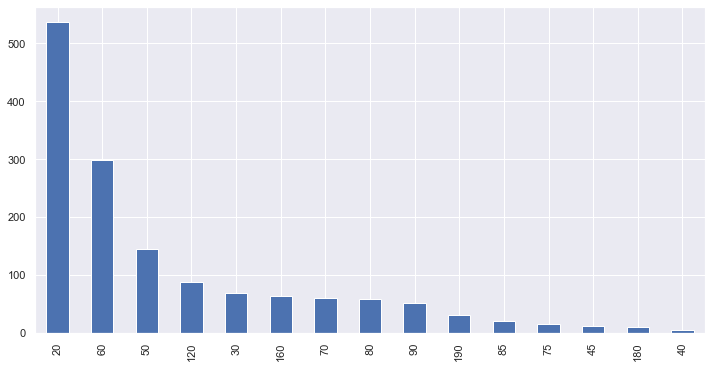

In [111]:
df["MSSubClass"].value_counts().plot(kind='bar',figsize=((12,6)))

#20- (1-STORY 1946 & NEWER ALL STYLES are maximum)
#60-(2-STORY 1946 & NEWER)
#40-(1-STORY W/FINISHED ATTIC ALL AGES) are minimum

In [113]:
df.drop("SalePrice",axis=1,inplace=True)

In [112]:
df["logprice"]=np.log(df["SalePrice"])

In [115]:
df.shape

(1460, 81)

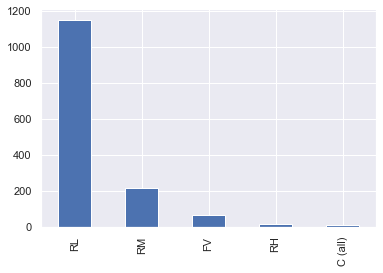

In [116]:
df["MSZoning"].value_counts().plot(kind='bar')

In [20]:
#RL-(Residential Low Density) are maximum properties 
#RM-Residential Medium Density
#C(all)-Commercial are the least

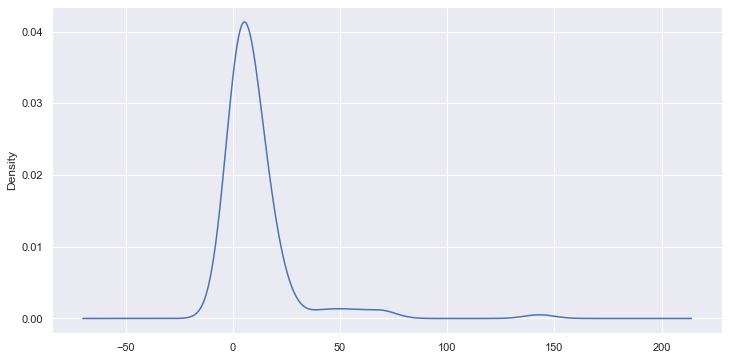

In [21]:
df["LotFrontage"].value_counts().plot(kind='kde',figsize=(12,6))

In [117]:
cat_col = df.dtypes[df.dtypes == 'object']
num_col =df.dtypes[df.dtypes != 'object']

In [23]:
for col in cat_col.index:
    print(f"--------------------{col.title()}-------------------------")
    total= df[col].value_counts()
    percent=df[col].value_counts() / df.shape[0]
    df1 = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df1)
    print('\n')

--------------------Mszoning-------------------------
         total   percent
RL        1151  0.788356
RM         218  0.149315
FV          65  0.044521
RH          16  0.010959
C (all)     10  0.006849


--------------------Street-------------------------
      total  percent
Pave   1454  0.99589
Grvl      6  0.00411


--------------------Alley-------------------------
      total   percent
Grvl     50  0.034247
Pave     41  0.028082


--------------------Lotshape-------------------------
     total   percent
Reg    925  0.633562
IR1    484  0.331507
IR2     41  0.028082
IR3     10  0.006849


--------------------Landcontour-------------------------
     total   percent
Lvl   1311  0.897945
Bnk     63  0.043151
HLS     50  0.034247
Low     36  0.024658


--------------------Utilities-------------------------
        total   percent
AllPub   1459  0.999315
NoSeWa      1  0.000685


--------------------Lotconfig-------------------------
         total   percent
Inside    1052  0.720548

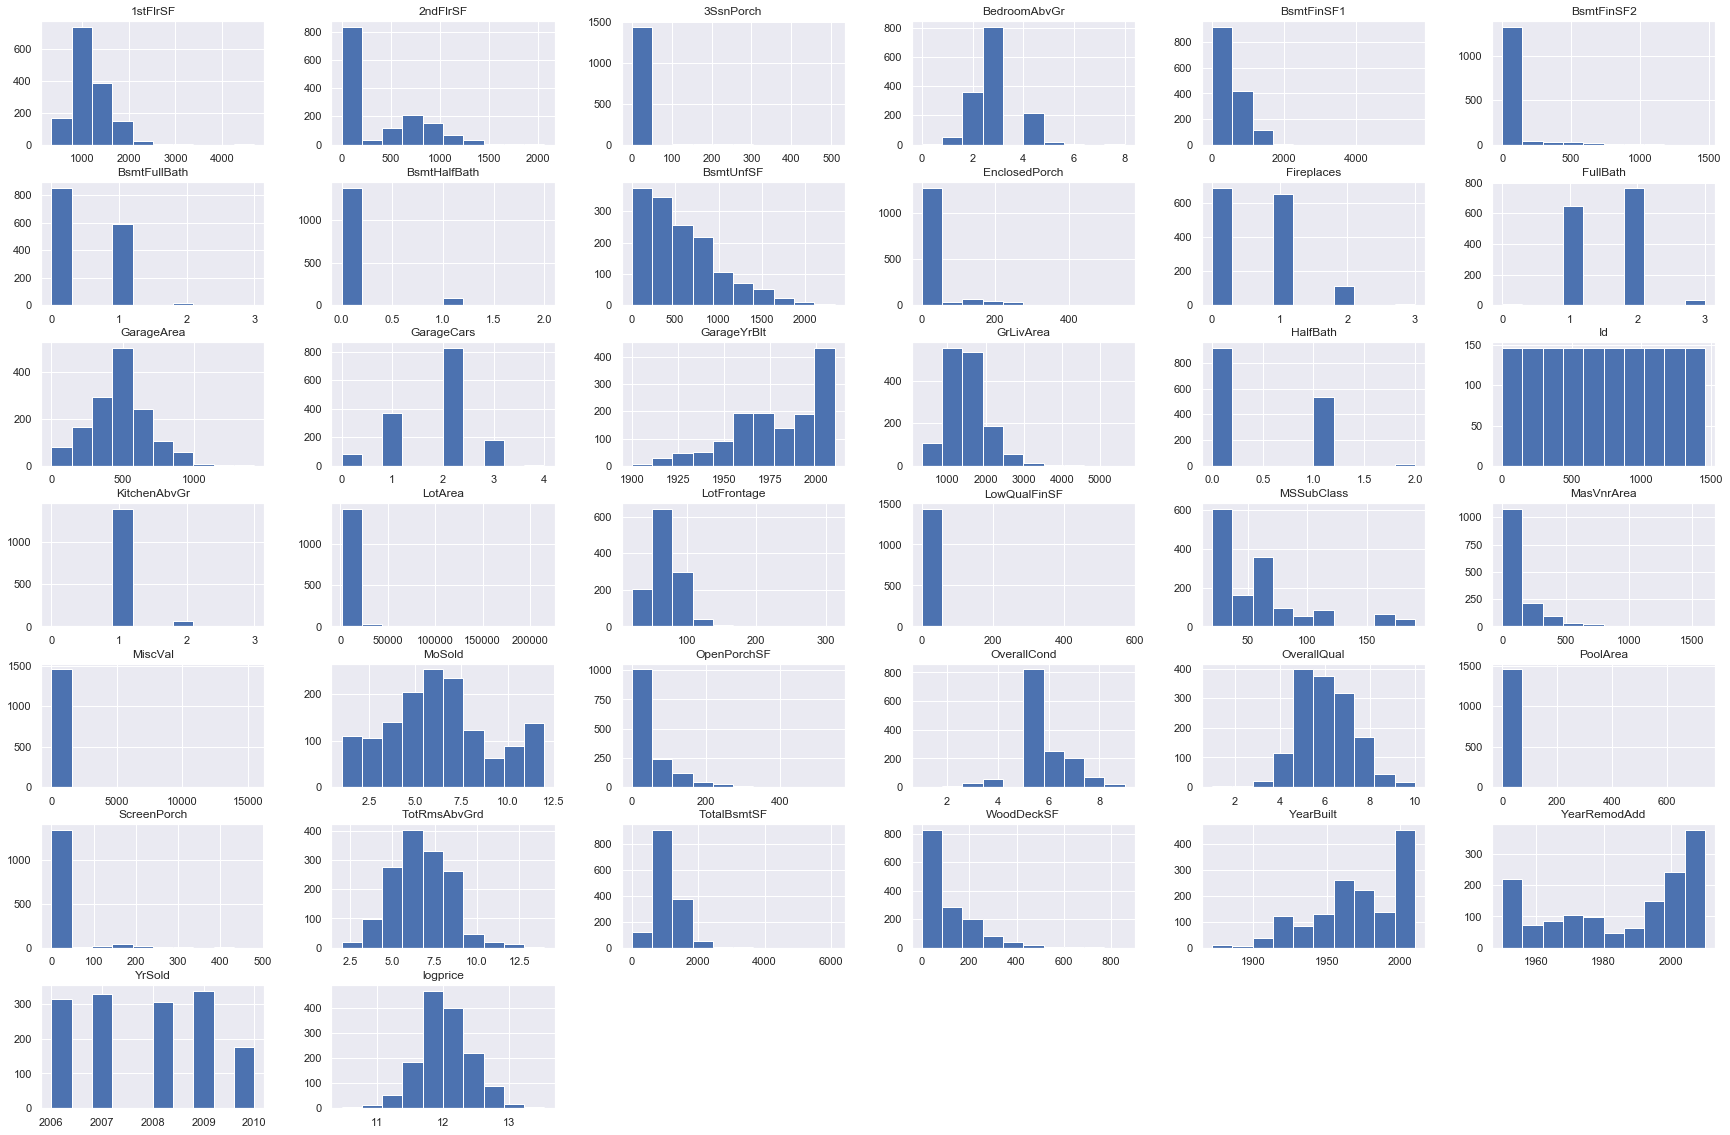

In [24]:
df[num_col.index].hist(figsize = (30,20));

Text(0, 0.5, 'Count')

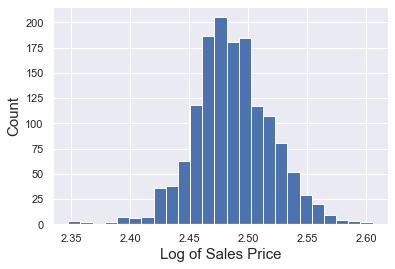

In [25]:

ax=np.log(df["logprice"]).hist(bins=25)
ax.set_xlabel("Log of Sales Price",fontsize=15)
ax.set_ylabel("Count",fontsize=15)

In [26]:
cat_col.index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

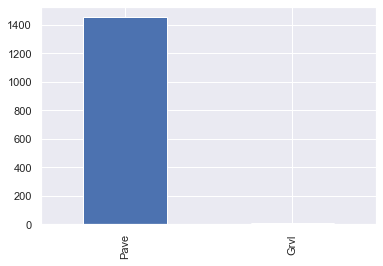

In [27]:
df["Street"].value_counts()
df["Street"].value_counts().plot(kind='bar')


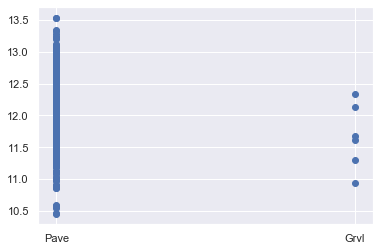

In [28]:
plt.scatter(df["Street"],df["logprice"])

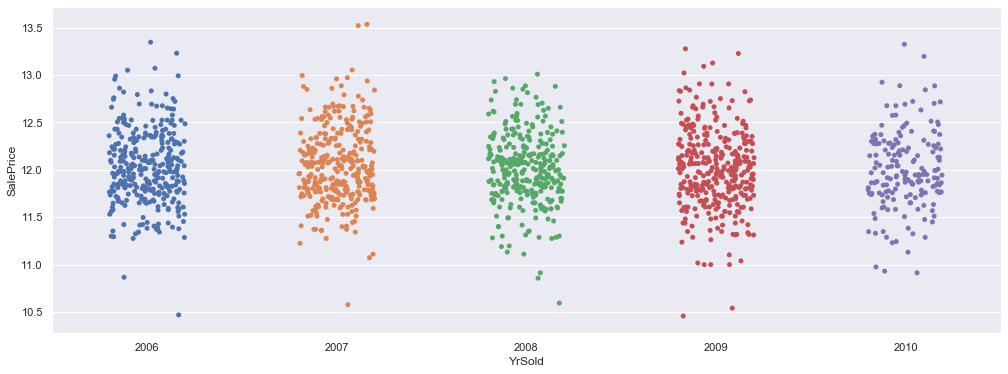

In [31]:
fig = plt.figure(figsize = (17,6))
sns.stripplot('YrSold','logprice', data = df,jitter = 0.2);
plt.xlabel('YrSold',fontsize = 12);
plt.ylabel('SalePrice',fontsize = 12);

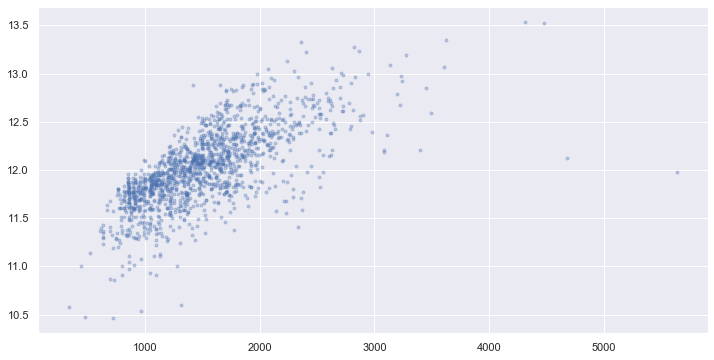

In [32]:
plt.figure(figsize=(12,6))
ax=plt.plot(df.GrLivArea, df.logprice, '.', alpha = 0.3)

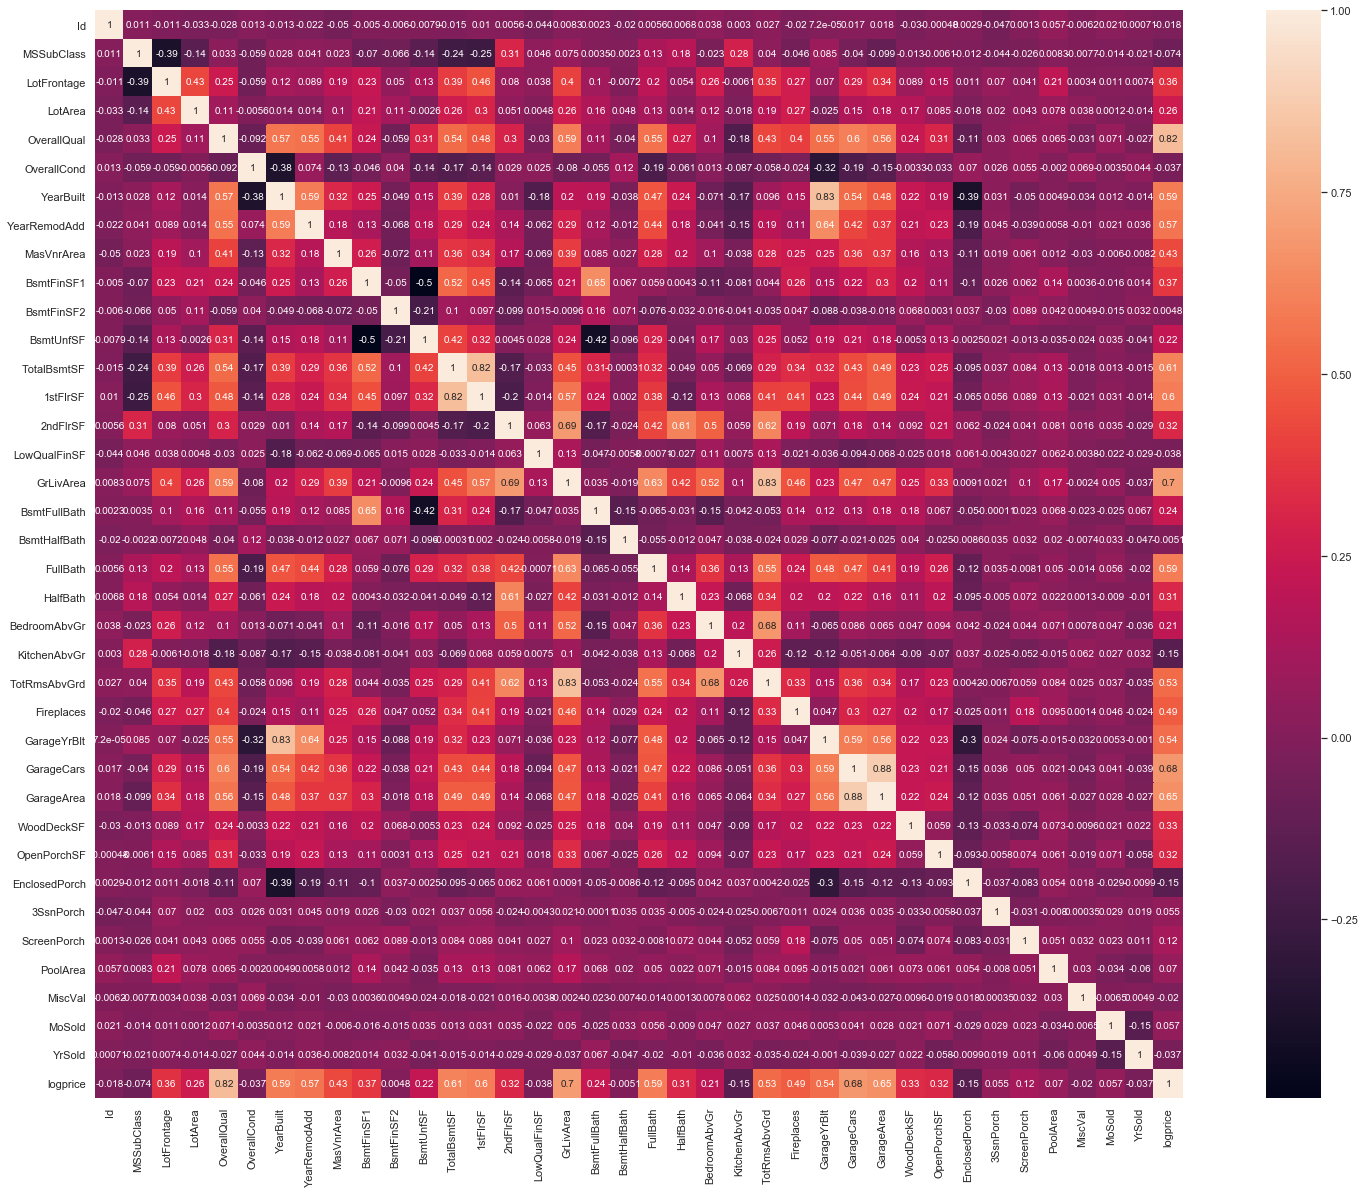

In [33]:
fig = plt.figure(figsize = (30,20))

sns.heatmap(df[list(num_col.index)].corr(),annot = True,square = True);

In [34]:
corrdata1=df[list(num_col.index[40:45])].corr()

In [106]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPo

In [ ]:
#YearBuilt and YearRemodAdd are corerealted
#1stFlrSF and TotalBsmtSF
#	GarageCars and GarageArea

In [119]:
df.drop(['YearRemodAdd',"GarageCars","Id","Utilities","TotalBsmtSF"],axis=1,inplace=True)

In [118]:
dt.drop(['YearRemodAdd',"GarageCars","Id","Utilities","TotalBsmtSF"],axis=1,inplace=True)

In [38]:
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(['logprice'], ascending=False, inplace=True)
corr.logprice

Find most important features relative to target


logprice         1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: logprice, dtype: float64

In [39]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

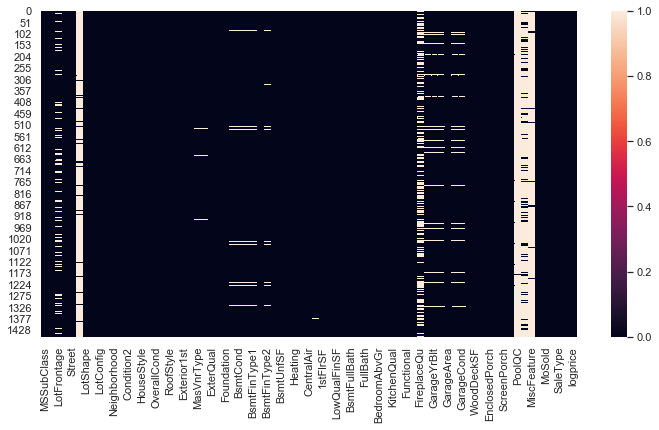

In [40]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())
plt.show()

In [41]:
dt.isnull().sum()/df.shape[0]

MSSubClass       0.000000
MSZoning         0.002740
LotFrontage      0.155479
LotArea          0.000000
Street           0.000000
Alley            0.926027
LotShape         0.000000
LandContour      0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000685
Exterior2nd      0.000685
MasVnrType       0.010959
MasVnrArea       0.010274
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.030137
BsmtCond         0.030822
BsmtExposure     0.030137
                   ...   
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000685
TotRmsAbvGrd     0.000000
Functional       0.001370
Fireplaces  

In [196]:
df['PoolQC'] = df['PoolQC'].fillna('None')
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['Alley'] = df['Alley'].fillna('None')
df['Fence'] = df['Fence'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [197]:
dt['PoolQC'] = dt['PoolQC'].fillna('None')
dt['MiscFeature'] = dt['MiscFeature'].fillna('None')
dt['Alley'] = dt['Alley'].fillna('None')
dt['Fence'] = dt['Fence'].fillna('None')
dt['FireplaceQu'] = dt['FireplaceQu'].fillna('None')

In [122]:
df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [123]:
dt['LotFrontage'] = dt.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [124]:
df["MasVnrType"]=df["MasVnrType"].fillna(int(0))

In [125]:
dt["MasVnrType"]=dt["MasVnrType"].fillna(int(0))

In [129]:
df["Electrical"]=df["Electrical"].fillna("Mix")

In [127]:
dt["Electrical"].value_counts()

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

In [132]:
df["BsmtQual"]=df['BsmtQual'].fillna("NA")

In [133]:
dt["BsmtQual"]=dt['BsmtQual'].fillna("NA")

In [134]:
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond'):
    df[col] = df[col].fillna('None')

In [135]:
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond'):
    dt[col] = dt[col].fillna('None')

In [136]:
df.columns[df.isnull().any()]

Index(['MasVnrArea', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [137]:
df["MasVnrArea"]=df["MasVnrArea"].fillna(0)

In [138]:
dt["MasVnrArea"]=dt["MasVnrArea"].fillna(0)

In [139]:
for col in ("GarageType","GarageFinish",'GarageQual',"GarageCond"):
    df[col]=df[col].fillna("None")

In [140]:
for col in ("GarageType","GarageFinish",'GarageQual',"GarageCond"):
    dt[col]=dt[col].fillna("None")

In [141]:
df["GarageYrBlt"]=df['GarageYrBlt'].fillna(0)

In [142]:
dt["GarageYrBlt"]=dt['GarageYrBlt'].fillna(0)

In [143]:
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(['logprice'], ascending=False, inplace=True)
corr.logprice

Find most important features relative to target


logprice         1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageArea       0.650888
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.426775
BsmtFinSF1       0.372023
LotFrontage      0.353288
GarageYrBlt      0.349014
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: logprice, dtype: float64

In [144]:
df["Functional"].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [145]:
dt["Functional"]=dt["Functional"].fillna("Typ")

In [146]:
df["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [147]:
dt["Exterior1st"].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [148]:
dt["MSZoning"]=dt["MSZoning"].fillna("RL")

In [149]:
dt["BsmtFullBath"]=dt["BsmtFullBath"].fillna(0)

In [150]:
dt["BsmtHalfBath"]=dt["BsmtHalfBath"].fillna(0)

In [151]:
dt["Exterior1st"]=dt["Exterior1st"].fillna("AsphShn")

In [152]:
dt["GarageArea"]=dt["GarageArea"].fillna(0)

In [153]:
dt["Exterior2nd"]=dt["Exterior1st"].fillna("VinylSd ")

In [155]:

for col in ["BsmtUnfSF","BsmtFinSF1","SaleType","BsmtFinSF2","KitchenQual"]:
    dt[col]=dt[col].fillna(0)

In [190]:
dt.isnull().sum().sort_values(ascending=False)


SaleCondition    0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofMatl         0
YearBuilt        0
HeatingQC        0
OverallCond      0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
                ..
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
GarageArea       0
GarageYrBlt      0
Electrical       0
GarageType       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath    

In [157]:
dt.shape

(1459, 75)

In [158]:
df.shape

(1460, 76)

In [168]:
dummy=pd.get_dummies(df)

In [169]:
dummy.shape

(1460, 299)

In [170]:
dummy1=pd.get_dummies(dt)

In [171]:
dummy1.shape

(1459, 281)

In [198]:
y=dummy["logprice"]
x=dummy.drop("logprice",axis=1)

In [199]:
x,dummy1 = x.align(dummy1, join='left', axis=1)

In [200]:
x.shape

(1460, 298)

In [201]:
dummy1.shape

(1459, 298)

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=200,test_size=0.33)

In [204]:
from sklearn.ensemble import RandomForestRegressor

In [205]:
clf=RandomForestRegressor(n_estimators=1000)

In [206]:
model=clf.fit(x_train,y_train)

In [207]:
model.score(x_train,y_train)

0.9806871171386587

In [208]:
y_test.shape

(482,)

In [185]:
model.feature_importances_

array([2.40008763e-03, 7.71677225e-03, 1.75287771e-02, 5.29416695e-01,
       8.30001550e-03, 2.24625159e-02, 3.89535033e-03, 2.89263067e-02,
       4.53778151e-04, 5.60469977e-03, 3.86368277e-02, 6.80505384e-03,
       1.05587228e-04, 1.45340301e-01, 1.09500837e-03, 2.17266478e-04,
       1.78140434e-03, 8.99347198e-04, 1.71754018e-03, 1.33757379e-03,
       2.44736073e-03, 2.72416791e-03, 6.69047526e-03, 5.12712378e-02,
       2.92164701e-03, 4.33893745e-03, 2.22392965e-03, 1.17956678e-04,
       4.08983253e-04, 1.33605619e-04, 2.84279241e-04, 3.56436049e-03,
       1.73317649e-03, 5.27881500e-04, 7.45846543e-05, 4.28518776e-05,
       8.56992042e-04, 2.30125926e-03, 2.68521015e-05, 5.83697450e-05,
       8.60188542e-05, 1.88336588e-04, 3.85933167e-05, 4.48760789e-04,
       3.53047493e-05, 1.14733358e-04, 1.32046244e-03, 3.81035508e-04,
       7.83255106e-05, 1.57272959e-04, 6.49036526e-04, 4.71639299e-04,
       2.65114247e-04, 7.53784673e-05, 1.49082940e-05, 4.59540238e-04,
      

In [186]:
pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False).head(5)

OverallQual    0.529417
GrLivArea      0.145340
GarageArea     0.051271
1stFlrSF       0.038637
BsmtFinSF1     0.028926
dtype: float64

In [209]:
model.score(x_test,y_test)

0.8660375961551617

In [214]:
pred=model.predict(x_test)

In [211]:
from sklearn.metrics import mean_squared_error

In [216]:
np.sqrt(mean_squared_error(y_test,pred))

0.1485860532079709

In [218]:
predictions=model.predict(dummy1)

In [219]:
pred1=np.exp(predictions)

In [220]:
pred1

array([127874.78456496, 153342.20220567, 174417.96979213, ...,
       150864.1004994 , 115757.0953998 , 225455.35362019])

In [227]:
output = pd.DataFrame({'Id': data.Id, 'SalePrice': pred1})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [223]:
data=pd.read_csv(r"C:\\Users\\Arjit's Hardwork\\Documents\\Python\\dipi\\PANDAS\\kaggle house prices\\test.csv")